In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
import pandas as pd
import math

%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
t_steps = [1, 2, 3, 5, 8, 13, 21, 34, 55]
dt_max_depth = 2


In [3]:
def draw_data(X, Y, Y_predicted, title=None):
    class_to_color = {
        2: "red",
        1: "pink",
        -1: "lightblue",
        -2: "blue"
    }

    # class_to_color = {
    #     1: "r",
    #     2: "pink",
    #     -1: "b",
    #     -2: "#33ff33"
    # }

    n = X.shape[0]
    colors = ['b'] * n

    for i in range(n):
        mn = 1 if Y[i] == Y_predicted[i] else 2
        colors[i] = class_to_color[Y[i] * mn]

    if title is not None:
        plt.title(title)
    plt.scatter(y=X[:,0], x=X[:,1],  c=colors)
    plt.show()


In [4]:
def boosting(X, Y):
    n = X.shape[0]

    w = [1/n] * n

    T = t_steps[-1]
    a = []
    b = []

    for t in range(T):
        bt = DecisionTreeClassifier(max_depth=dt_max_depth)
        bt.fit(X, Y, sample_weight=w)

        YP = bt.predict(X)
        nb = 0

        for i in range(n):
            if YP[i] != Y[i]:
                nb += w[i]

        ins = (1 - nb + 1 / n) / (nb + 1 / n)
        at = 1/2 * math.log(ins)

        a.append(at)
        b.append(bt)

        for i in range(n):
            w[i] = w[i] * math.exp(-at * Y[i] * YP[i])

        ws = sum(w)

        for i in range(n):
            w[i] /= ws

    def predict(x_test, steps=t_steps[-1]):
        r = np.zeros(x_test.shape[0])

        for j in range(steps):
            r += a[j] * b[j].predict(x_test)

        # tough decision
        r = np.array(list(map(lambda y: 1 if y > 0 else -1, r)))

        return r

    return predict


In [5]:
def processing(name):
    data = pd.read_csv(name)
    X = data.values[:,:-1]
    Y_words = data.values[:,-1]

    Y = np.array(list(map(lambda x: 1 if x == 'P' else -1, Y_words)))

    # drawing train data
    draw_data(X, Y, Y)

    trained_model = boosting(X, Y)

    accuracies = []

    for t in t_steps:
        print(t, 'steps')
        Y_predicted = trained_model(X, t)
        accuracy = metrics.accuracy_score(Y, Y_predicted)
        print('accuracy', accuracy)
        accuracies.append(accuracy)
        draw_data(X, Y, Y_predicted, str(t) + ' steps')

    plt.plot(t_steps, accuracies, marker='o')
    plt.show()


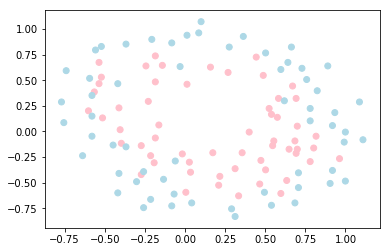

1 steps
accuracy 0.7033898305084746
2 steps
accuracy 0.7033898305084746
3 steps
accuracy 0.7457627118644068
5 steps
accuracy 0.847457627118644
8 steps
accuracy 0.847457627118644
13 steps
accuracy 0.8559322033898306
21 steps
accuracy 0.9067796610169492
34 steps
accuracy 0.9322033898305084
55 steps
accuracy 0.940677966101695


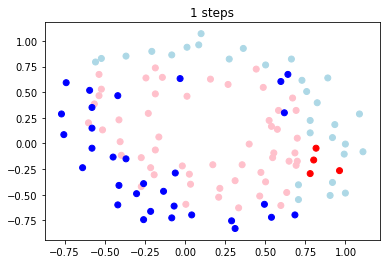

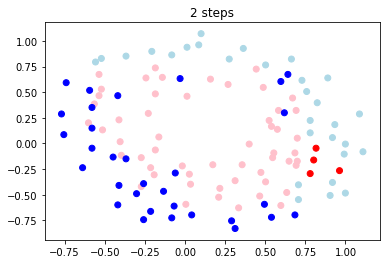

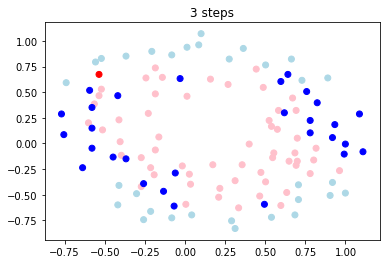

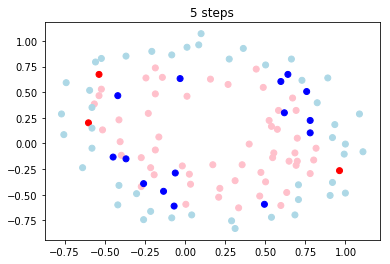

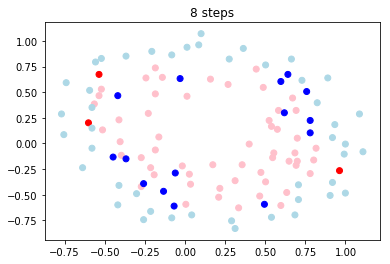

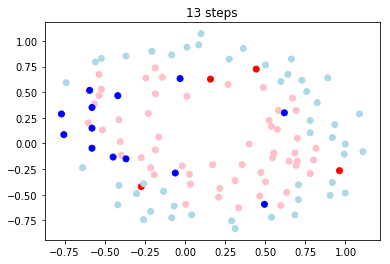

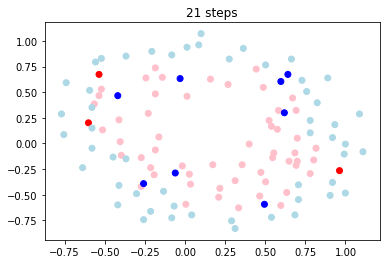

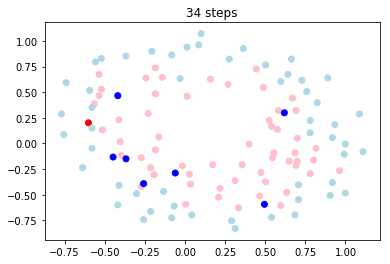

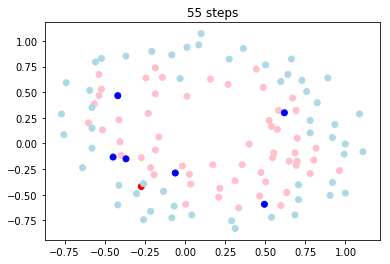

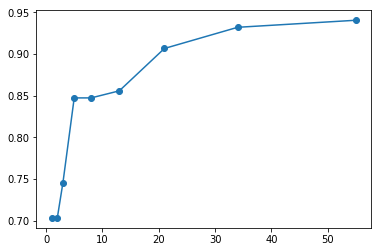

In [6]:
processing('./data/chips.csv')


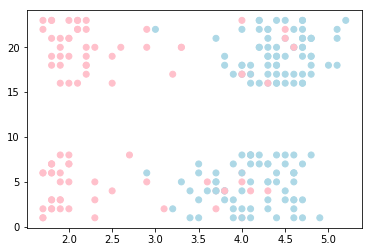

1 steps
accuracy 0.9009009009009009
2 steps
accuracy 0.9009009009009009
3 steps
accuracy 0.9009009009009009
5 steps
accuracy 0.9009009009009009
8 steps
accuracy 0.9009009009009009
13 steps
accuracy 0.9009009009009009
21 steps
accuracy 0.9009009009009009
34 steps
accuracy 0.9009009009009009
55 steps
accuracy 0.9054054054054054


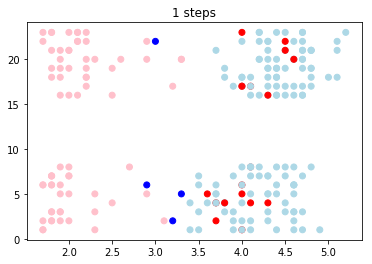

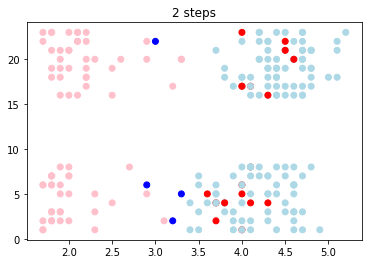

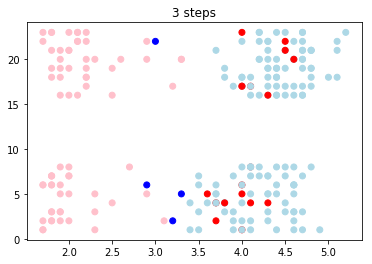

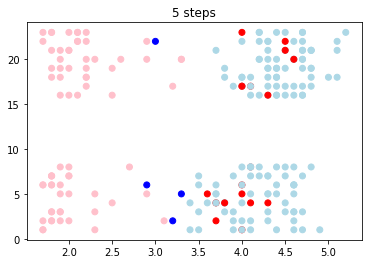

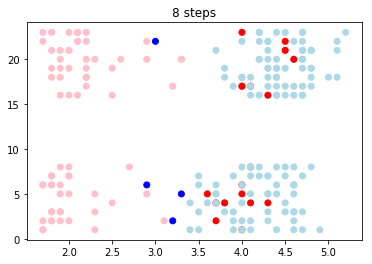

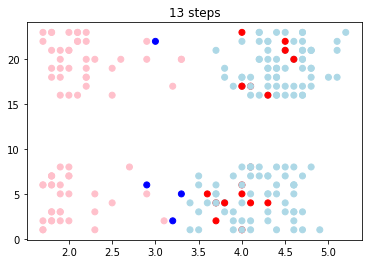

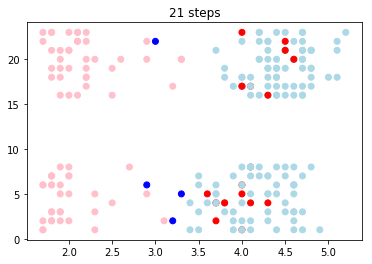

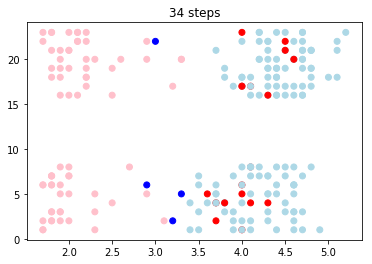

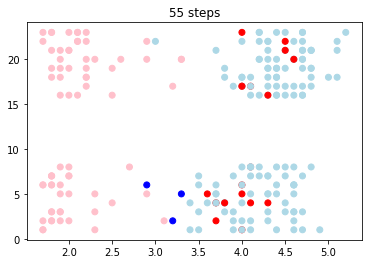

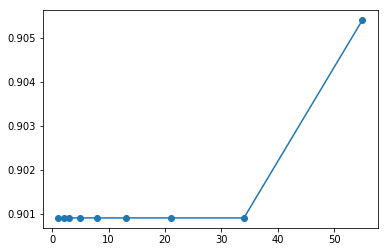

In [7]:
processing('././data/geyser.csv')
